In [155]:
import glob
import tifffile
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from tqdm import tqdm
import rasterio
from rasterio.plot import show
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

warnings.simplefilter('ignore')

In [156]:
train_path =  'train/s2_image/'
mask_path = 'train/mask/'

masks = glob.glob(f'{mask_path}/*')
trains = glob.glob(f'{train_path}/*')
masks.sort()
trains.sort()

In [157]:
train_path =  'train/s2_image/'
mask_path = 'train/mask/'

masks = glob.glob(f'{mask_path}/*')
trains = glob.glob(f'{train_path}/*')
masks.sort()
trains.sort()

In [158]:
path = 'train/s2_image/train_s2_image_90.tif'

In [159]:
ds = rasterio.open(path)

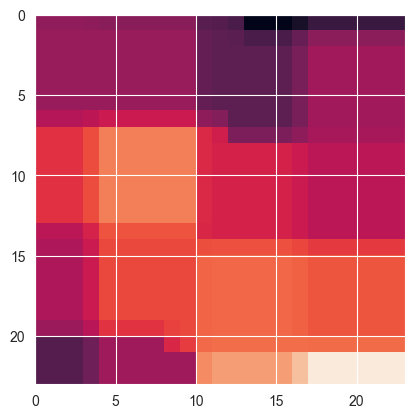

<Axes: >

In [160]:
show((ds, 1))

In [161]:
ds.read(12)

array([[1392.82625192, 1427.61220048, 1549.00970358, 1438.80199676,
        1252.12051541, 1124.77196345, 1002.60303541,  999.54622263,
         960.8109608 ,  947.37164807,  827.65079312,  812.98968406,
         805.83250276,  750.        ,  798.88313184,  936.5       ,
        1064.19387354, 1247.5       , 1247.5       , 1273.78262084,
        1289.        , 1401.57912117, 1433.        ],
       [1406.        , 1441.97007643, 1567.5       , 1455.58072193,
        1266.        , 1125.42344739,  995.5       ,  995.5       ,
         963.57609315,  952.5       ,  834.45578628,  820.        ,
         833.9535181 ,  942.80360943,  994.24010673, 1139.04526549,
        1237.24032955, 1378.20055208, 1378.20055208, 1385.71746365,
        1390.06968158, 1482.65674665, 1508.49783443],
       [1867.12778561, 1804.46942346, 1585.8015697 , 1542.48527093,
        1469.11153825, 1315.48043812, 1173.4917367 , 1173.4917367 ,
        1071.76596351, 1036.47190804,  916.50947509,  901.81878219,
        

In [162]:
ds.indexes

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

In [163]:
data_list = []
for i in range(len(trains)):
    img = tifffile.imread(trains[i]).astype(float)
    msk = tifffile.imread(masks[i]).astype(float)

    reshaped_img = img.reshape(-1, 12) # (23, 23, 12) -> (23*23, 12)
    flatten_mask = msk.reshape(-1,1)   # (23, 23) -> (23*23, 1)


    combine_data = np.hstack((reshaped_img, flatten_mask))

    data_list.append(combine_data)

data_list = np.vstack(data_list)

In [164]:
df = pd.DataFrame(data=data_list, columns= ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11','B12', 'Mask'])
df

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,Mask
0,265.800583,279.066472,488.098252,331.572300,817.002914,2400.280728,3084.914212,3236.613360,3332.798479,3251.691757,1598.907575,818.413402,0.0
1,265.800583,271.067287,472.501621,322.083156,817.002914,2400.280728,3084.914212,3188.111508,3332.798479,3251.691757,1598.907575,818.413402,0.0
2,265.800583,240.942322,424.775329,279.931718,784.908433,2322.216009,2998.675982,2906.248048,3251.978778,3251.691757,1549.296809,798.364396,0.0
3,265.800583,222.820502,411.740847,245.060190,737.346930,2206.530216,2870.877686,2640.218320,3132.210318,3251.691757,1475.777544,768.653340,0.0
4,378.735906,229.331874,434.090056,254.714547,782.884060,2226.587592,2840.185718,2651.574272,3084.218565,3341.757199,1562.631939,809.818550,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133567,1166.000000,1049.347260,1190.897532,1254.509945,1365.000000,1379.000000,1468.000000,1463.018392,1461.000000,1490.000000,2027.000000,1859.000000,0.0
1133568,1166.000000,1090.473893,1243.402564,1362.630769,1365.000000,1379.000000,1468.000000,1572.583217,1461.000000,1490.000000,2027.000000,1859.000000,0.0
1133569,1089.344375,1097.961592,1251.727616,1360.179232,1399.362866,1489.137392,1583.130287,1621.304781,1591.402672,1639.199454,2009.671717,1797.029361,0.0
1133570,905.000000,1018.380712,1222.829764,1265.576354,1482.000000,1754.000000,1860.000000,1952.131222,1905.000000,1998.000000,1968.000000,1648.000000,0.0


In [165]:
def create_feature (df, par = None):
    pixel_size = [60,10,10,10,20,20,20,10,20,60,20,20]
    wavelength_S2A = [443.9, 496.6, 560, 664.5,703.9,740.2,782.5,835.1,864.8,945,1613.7,2204.4]
    wavelength_S2B = [442.3,492.1,559,665,703.8,739.1,779.7,833,864,943.2,1610.4,2185.7]
    depths_dict = {'Depth_B{}'.format(i+1): depth for i, depth in enumerate(pixel_size)}
    wavelength_S2A_dict = {'Depth_B{}'.format(i+1): wave for i, wave in enumerate(wavelength_S2A)}
    wavelength_S2B_dict = {'Depth_B{}'.format(i+1): wave for i, wave in enumerate(wavelength_S2B)}
    # Add informations to the main dataset
    for col, depth in depths_dict.items():
        df[col + '_Depth'] = depth

    for col, wave in wavelength_S2A_dict.items():
        df[col + '_S2A'] = wave

    for col, wave in wavelength_S2B_dict .items():
        df[col + '_S2B'] = wave

    if par == True :
        column_to_move = 'Mask'

        # Get a list of columns excluding the one to move
        other_columns = [col for col in df.columns if col != column_to_move]

        # Reorder columns and move the specified column to the end
        new_order = other_columns + [column_to_move]
        df = df[new_order]
        return df
    else :
        return df

In [166]:
#df = create_feature (df, par = True)

In [167]:
df

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,Mask
0,265.800583,279.066472,488.098252,331.572300,817.002914,2400.280728,3084.914212,3236.613360,3332.798479,3251.691757,1598.907575,818.413402,0.0
1,265.800583,271.067287,472.501621,322.083156,817.002914,2400.280728,3084.914212,3188.111508,3332.798479,3251.691757,1598.907575,818.413402,0.0
2,265.800583,240.942322,424.775329,279.931718,784.908433,2322.216009,2998.675982,2906.248048,3251.978778,3251.691757,1549.296809,798.364396,0.0
3,265.800583,222.820502,411.740847,245.060190,737.346930,2206.530216,2870.877686,2640.218320,3132.210318,3251.691757,1475.777544,768.653340,0.0
4,378.735906,229.331874,434.090056,254.714547,782.884060,2226.587592,2840.185718,2651.574272,3084.218565,3341.757199,1562.631939,809.818550,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133567,1166.000000,1049.347260,1190.897532,1254.509945,1365.000000,1379.000000,1468.000000,1463.018392,1461.000000,1490.000000,2027.000000,1859.000000,0.0
1133568,1166.000000,1090.473893,1243.402564,1362.630769,1365.000000,1379.000000,1468.000000,1572.583217,1461.000000,1490.000000,2027.000000,1859.000000,0.0
1133569,1089.344375,1097.961592,1251.727616,1360.179232,1399.362866,1489.137392,1583.130287,1621.304781,1591.402672,1639.199454,2009.671717,1797.029361,0.0
1133570,905.000000,1018.380712,1222.829764,1265.576354,1482.000000,1754.000000,1860.000000,1952.131222,1905.000000,1998.000000,1968.000000,1648.000000,0.0


In [168]:
#df['is_train'].value_counts()

In [169]:
X = df.iloc[:,0:12]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1133567    0.0
1133568    0.0
1133569    0.0
1133570    0.0
1133571    0.0
Name: Mask, Length: 1133572, dtype: float64


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10, 'Score'))  #print 10 best features

In [170]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#data = df[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11','B12']]


0.0    1027487
1.0     106085
Name: Mask, dtype: int64


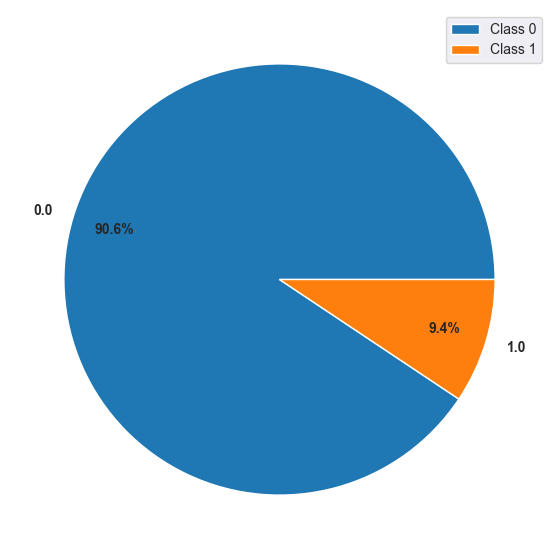

In [171]:
import matplotlib.pyplot as plt
figure1 = plt.figure(figsize=(10,7), facecolor='w')
plt.axis('off')
x = y.value_counts()
print(x)

plt.pie(x, labels=[i for i in x.index], autopct="%.1f%%", pctdistance=0.8,
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.legend(['Class 0', 'Class 1'])
plt.show()

In [172]:
from scipy.stats import boxcox

In [173]:
cols = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11',
        'B12']
for col in cols:
    df[col] = np.log1p(df[col])

In [174]:
df[:10]

,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,Mask
0,5.586501,5.635027,6.192563,5.806857,6.706866,7.783758,8.034603,8.082592,8.111868,8.087238,7.377701,6.708589,0.0
1,5.586501,5.606049,6.160155,5.777910,6.706866,7.783758,8.034603,8.067498,8.111868,8.087238,7.377701,6.708589,0.0
2,5.586501,5.488699,6.053912,5.638112,6.666840,7.750708,8.006260,7.974962,8.087326,8.087238,7.346202,6.683817,0.0
3,5.586501,5.410844,6.022820,5.505576,6.604414,7.699630,7.962721,7.878996,8.049813,8.087238,7.297618,6.645940,0.0
4,5.939476,5.439521,6.075553,5.544062,6.664261,7.708674,7.951977,7.883286,8.034378,8.114551,7.354767,6.698044,0.0
5,6.117359,5.460201,6.102410,5.580417,6.701584,7.714551,7.944880,7.889549,8.024143,8.132035,7.390483,6.730739,0.0
6,6.117359,5.467100,6.109705,5.643639,6.701584,7.714551,7.944880,7.931511,8.024143,8.132035,7.390483,6.730739,0.0
7,6.117359,5.769891,6.329404,5.917743,6.999280,7.894599,8.064863,8.011044,8.136408,8.132035,7.635346,6.941123,0.0
8,6.117232,6.048056,6.556147,6.284872,7.026679,7.910526,8.076302,8.136785,8.147583,8.131995,7.658934,6.963442,0.0
9,6.116186,6.093918,6.598445,6.372062,7.089869,7.916802,8.081737,8.124853,8.160648,8.131664,7.696795,7.036727,0.0


In [175]:
def description_var(df, col):
    colData=df[col]
    moyenne=np.mean(colData)
    mediane = np.median(colData)
    Q1 = np.percentile(colData, 25)
    Q3 = np.percentile(colData, 75)
    max = colData.max()
    min = colData.min()
    variance = np.var(colData)
    sd = np.std(colData)
    skew=pd.DataFrame(colData).skew()[0]
    kurt=pd.DataFrame(colData).kurtosis()[0]

    print("Measures statistiques of variable {}" .format(col))
    print(" ")
    print("Mean of variable {} is : {} ".format(col,round(moyenne, 2)))
    print("MEdian of variable {} is : {} ".format(col,round(mediane, 2)))
    print("Quartile Q1 value : {} ".format(round(Q1, 2)))
    print("Quartile Q3 value : {} ".format(round(Q3, 2)))
    print("Maximum Value : {} ".format(max))
    print("Minimum Value : {} ".format(min))
    print(" ")
    print(" ")
    print("Distribution of variable {}" .format(col))
    print(" ")
    print("Variance of variable {} is : {} " .format(col,round(variance, 2)))
    print("Eta-squared of variable {} is : {} " .format(col,round(sd, 2)))
    print("Eta-squared interquartile of variable {} is : {} " .format(col,round(Q3-Q1, 2)))
    print(" ")
    print(" ")
    print("Measures de forme for variable {}" .format(col))
    print(" ")
    print("Skewewness empirique of variable {} is{} " .format(col,round(skew, 4)))
    if (skew==0):
        print("Distribution of variable {} is symetrique." .format(col))
    elif (skew>0):
        print("Distribution of variable {} is skewed to the right." .format(col))
    else:
        print("Distribution of variable {} is skewed to the left." .format(col))
    print(" ")
    print("Kurtosis  for variable {} is {} " .format(col, round(kurt, 4)))
    if kurt==0:
        print("Distribution of variable {} has the same flattening as the normal distribution" .format(col))
    elif kurt>0:
        print("Distribution of variable {} is less flat than the normal distribution, observations are more concentrated.." .format(col))
    else:
        print("The distribution of the variable {} is more flattened than the normal distribution, the observations are less concentrated." .format(col))


    print(" ")
    plt.figure(figsize=(8,6))
    sns.displot(data = df,x = col,kde = True)
    plt.title("Representation statistique of variable {}".format(col))
    plt.xlabel("{}".format(col))
    plt.ylabel("Log Count")
    plt.show()

    del skew
    del kurt

Measures statistiques of variable B1
 
Mean of variable B1 is : 6.33 
MEdian of variable B1 is : 6.37 
Quartile Q1 value : 6.13 
Quartile Q3 value : 6.58 
Maximum Value : 8.191463051326927 
Minimum Value : 0.0 
 
 
Distribution of variable B1
 
Variance of variable B1 is : 0.15 
Eta-squared of variable B1 is : 0.39 
Eta-squared interquartile of variable B1 is : 0.45 
 
 
Measures de forme for variable B1
 
Skewewness empirique of variable B1 is-0.6949 
Distribution of variable B1 is skewed to the left.
 
Kurtosis  for variable B1 is 2.5069 
Distribution of variable B1 is less flat than the normal distribution, observations are more concentrated..
 


<Figure size 800x600 with 0 Axes>

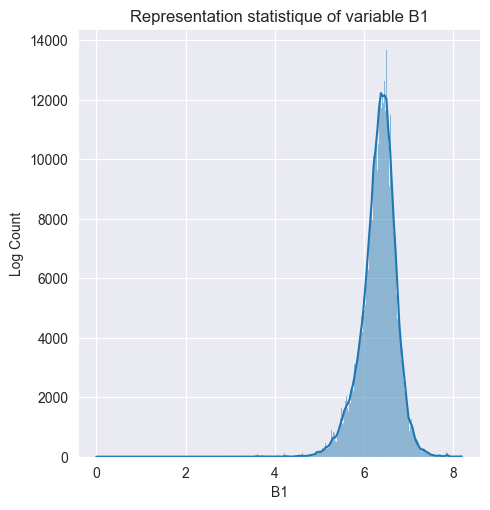

Measures statistiques of variable B2
 
Mean of variable B2 is : 6.41 
MEdian of variable B2 is : 6.47 
Quartile Q1 value : 6.15 
Quartile Q3 value : 6.72 
Maximum Value : 8.939595797740177 
Minimum Value : 3.14329565451158 
 
 
Distribution of variable B2
 
Variance of variable B2 is : 0.23 
Eta-squared of variable B2 is : 0.48 
Eta-squared interquartile of variable B2 is : 0.57 
 
 
Measures de forme for variable B2
 
Skewewness empirique of variable B2 is-0.4215 
Distribution of variable B2 is skewed to the left.
 
Kurtosis  for variable B2 is 0.8171 
Distribution of variable B2 is less flat than the normal distribution, observations are more concentrated..
 


<Figure size 800x600 with 0 Axes>

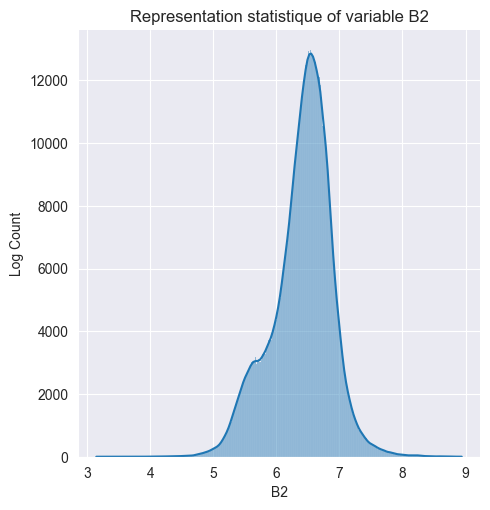

In [176]:
for i in ['B1','B2']:
    description_var(df, i)

In [177]:
import xgboost as xgb
from optuna.integration import CatBoostPruningCallback
from sklearn.model_selection import RepeatedKFold
import optuna
from optuna import create_study

In [178]:
#X_train.reset_index(drop = True, inplace = True)
##y_train.reset_index(drop = True, inplace = True)

In [179]:
#y_train.value_counts()

sm = SMOTE(random_state=1945)
X,y = sm.fit_resample(X, y)
print(X.shape)
print(y.shape)


logloss = []

skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'gamma': 5
}
for train_index, test_index in tqdm(skf.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)

    # Create the DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)

    dtest = xgb.DMatrix(X_test, label=y_test)
    model = xgb.train(params, dtrain,
                      evals=[(dtest, 'Validation')],

                      verbose_eval=False)

    # Predict on the test set
    y_pred = model.predict(dtest)
    pred_labels = np.rint(y_pred)
    print(y_test.shape)
    print(y_pred.shape)
    print(y_pred[:5])

In [180]:
def f1_eval(y_pred, dtrain):
    y_true = dtrain.get_label()
    err = 1-f1_score(y_true, np.round(y_pred), average='weighted')
    return 'f1_err', err

In [181]:
from sklearn.metrics import log_loss
from tqdm import tqdm
N_TRIALS = 100
RS = 0  # random state
N_JOBS = -1  # number of parallel threads

# repeated K-folds
N_SPLITS = 5
N_REPEATS = 2

# Optuna
MULTIVARIATE = True




def objective(
        trial,
        X,
        y,
        random_state=0,
        n_splits=N_SPLITS ,
        n_repeats=N_REPEATS,
        n_jobs=-1,
        early_stopping_rounds=10,
):
    # Catboost parameters
    param = {
        'objective': 'binary:logistic',
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param['subsample'] = trial.suggest_float('subsample', 0.50, 1)
        param['min_child_weight'] = trial.suggest_int('min_child_weight', 5, 10)
        param['colsample_bytree']= trial.suggest_float('colsample_bytree', 0.50, 1)
        param['max_depth']= trial.suggest_int('max_depth', 1, 20)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)

    oversample = RandomUnderSampler(sampling_strategy="majority")
    X,y = oversample.fit_resample(X, y)


    f1_scores = []

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for train_index, test_index in tqdm(skf.split(X, y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Create the DMatrix for XGBoost
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_test, label=y_test)


        early_stop = xgb.callback.EarlyStopping(rounds=10,min_delta=1e-3,
                                                data_name='Train')

        # Train the model with the current hyperparameters
        model = xgb.train(param, dtrain,
                          evals=[(dtrain, 'Train'), (dtest, 'Valid')],
                          callbacks=[early_stop],
                          feval=f1_eval,
                          verbose_eval=False)

        # Predict on the test set
        y_pred = model.predict(dtest)

        # Convert probabilities to binary predictions

        pred_labels = [1 if pred >= 0.6 else 0 for pred in y_pred]

        ll= f1_score(y_test, pred_labels, average='binary')
        f1_scores.append(ll)

    mean_of_f1_scores = sum(f1_scores) / len(f1_scores)
    print("mean_of_f1_scores :", mean_of_f1_scores)
    return mean_of_f1_scores

In [182]:
def prep_data(X,y):
    study = optuna.create_study(direction="maximize",pruner=optuna.pruners.HyperbandPruner(),sampler=optuna.samplers.TPESampler(seed=10))

    study.optimize(lambda trial :objective(trial,X, y,
                                           random_state=RS,
                                           n_splits=N_SPLITS,
                                           n_repeats=N_REPEATS,
                                           n_jobs=-1,
                                           ),
                   n_trials=N_TRIALS,
                   n_jobs=-1,
                   )

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    best_par = study.best_params
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

    best_params = trial.params
    best_params['objective'] = 'binary:logistic'


    return best_par

In [183]:
#Apply StandardScaler to the input features
#scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X)
# Convert the scaled data back to pandas DataFrame
#X = pd.DataFrame(X_scaled, columns=X.columns)

In [184]:
def final_class(X,y ):

    best_param=prep_data(X,y)
    return best_param

In [185]:
best_params = final_class(X, y)

[I 2023-11-28 13:55:40,900] A new study created in memory with name: no-name-d240cd4f-e88c-467c-ad24-a3f0289a842a
0it [00:00, ?it/s]
0it [00:00, ?it/s]


0it [00:00, ?it/s]




0it [00:00, ?it/s]

0it [00:00, ?it/s]



0it [00:00, ?it/s]





0it [00:00, ?it/s]






0it [00:00, ?it/s]







0it [00:00, ?it/s]








0it [00:00, ?it/s]











0it [00:00, ?it/s]









0it [00:00, ?it/s]










0it [00:00, ?it/s]














0it [00:00, ?it/s]













0it [00:00, ?it/s]












0it [00:00, ?it/s]
1it [00:07,  7.96s/it]





1it [00:08,  8.15s/it]



1it [00:08,  8.37s/it]


1it [00:09,  9.12s/it]

1it [00:09,  9.52s/it]











1it [00:09,  9.61s/it]






1it [00:10, 10.20s/it]














1it [00:10, 10.44s/it]









1it [00:10, 10.66s/it]












1it [00:10, 10.65s/it]




1it [00:11, 11.78s/it]







1it [00:13, 13.38s/it]













1it [00:13, 13.45s/it]








1it [00:15, 15.88s/it]
2it [00:17,  8.85s/it]





2it [00:17,  9.06s/it]



2it [0

mean_of_f1_scores : 0.14526801813158333


5it [00:48,  9.73s/it]
[I 2023-11-28 13:56:33,660] Trial 0 finished with value: 0.03667337262905761 and parameters: {'booster': 'gblinear', 'learning_rate': 0.06417719052610234, 'lambda': 1.7164807987244137e-06, 'alpha': 0.001433394096726882}. Best is trial 5 with value: 0.14526801813158333.


mean_of_f1_scores : 0.03667337262905761






5it [00:49,  9.91s/it]
[I 2023-11-28 13:56:34,818] Trial 4 finished with value: 0.039204160716706626 and parameters: {'booster': 'gblinear', 'learning_rate': 0.06544202016277532, 'lambda': 5.102990686015577e-08, 'alpha': 1.991688779052104e-07}. Best is trial 5 with value: 0.14526801813158333.


mean_of_f1_scores : 0.039204160716706626



0it [00:00, ?it/s]




4it [00:50, 13.00s/it]



0it [00:00, ?it/s]








3it [00:51, 17.58s/it]





5it [00:52, 10.51s/it][A
[I 2023-11-28 13:56:37,568] Trial 1 finished with value: 0.0003202801715584038 and parameters: {'booster': 'gblinear', 'learning_rate': 0.04302652199743504, 'lambda': 1.399434210450996e-08, 'alpha': 0.012451734018951374}. Best is trial 5 with value: 0.14526801813158333.


mean_of_f1_scores : 0.0003202801715584038





5it [00:53, 10.67s/it]
[I 2023-11-28 13:56:38,576] Trial 3 finished with value: 1.884925309834598e-05 and parameters: {'booster': 'gblinear', 'learning_rate': 0.03539422240334542, 'lambda': 3.0089766139924487e-06, 'alpha': 2.234959908295298e-05}. Best is trial 5 with value: 0.14526801813158333.


mean_of_f1_scores : 1.884925309834598e-05




5it [00:53, 10.80s/it]
[I 2023-11-28 13:56:39,246] Trial 7 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'learning_rate': 0.022442327398743054, 'lambda': 0.24881586394983007, 'alpha': 0.005548385011638192}. Best is trial 5 with value: 0.14526801813158333.


mean_of_f1_scores : 0.0


0it [00:00, ?it/s]

0it [00:00, ?it/s]


0it [00:00, ?it/s]











5it [00:55, 11.17s/it]
[I 2023-11-28 13:56:41,338] Trial 11 finished with value: 1.884925309834598e-05 and parameters: {'booster': 'gblinear', 'learning_rate': 0.03402340884141781, 'lambda': 6.433957875986531e-06, 'alpha': 0.00022727460677450067}. Best is trial 5 with value: 0.14526801813158333.


mean_of_f1_scores : 1.884925309834598e-05

















5it [00:56, 11.31s/it]
[I 2023-11-28 13:56:42,205] Trial 13 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'learning_rate': 0.03412369561987261, 'lambda': 0.007424923683988028, 'alpha': 0.0013114879175245868, 'subsample': 0.996126949480592, 'min_child_weight': 9, 'colsample_bytree': 0.6460281119911713, 'max_depth': 1, 'eta': 0.0193074677207628, 'gamma': 0.028077741869671817, 'grow_policy': 'lossguide'}. Best is trial 5 with value: 0.14526801813158333.


mean_of_f1_scores : 0.0









5it [00:58, 11.60s/it]
[I 2023-11-28 13:56:43,309] Trial 8 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'learning_rate': 0.006011164238469812, 'lambda': 1.3045011576186445e-07, 'alpha': 0.023870932682025937}. Best is trial 5 with value: 0.14526801813158333.


mean_of_f1_scores : 0.0









0it [00:00, ?it/s]











0it [00:00, ?it/s]














0it [00:00, ?it/s]







4it [01:00, 15.96s/it]









5it [01:00, 12.13s/it]
[I 2023-11-28 13:56:46,170] Trial 14 finished with value: 0.7315202488266686 and parameters: {'booster': 'gbtree', 'learning_rate': 0.04597265765717321, 'lambda': 0.0022401346117342335, 'alpha': 1.513900820374651e-07, 'subsample': 0.6638356929295108, 'min_child_weight': 8, 'colsample_bytree': 0.557659764414615, 'max_depth': 3, 'eta': 2.6748659847449644e-07, 'gamma': 0.00018736295165334085, 'grow_policy': 'depthwise'}. Best is trial 14 with value: 0.7315202488266686.


mean_of_f1_scores : 0.7315202488266686
















4it [01:00, 15.95s/it]












5it [01:02, 12.45s/it]
[I 2023-11-28 13:56:47,954] Trial 6 finished with value: 0.44723008131298564 and parameters: {'booster': 'gbtree', 'learning_rate': 0.02910553439902072, 'lambda': 0.10268451037652848, 'alpha': 6.39397166357398e-05, 'subsample': 0.9319347945038299, 'min_child_weight': 6, 'colsample_bytree': 0.6787548179159157, 'max_depth': 2, 'eta': 4.353284308645646e-06, 'gamma': 8.755309908379429e-06, 'grow_policy': 'lossguide'}. Best is trial 14 with value: 0.7315202488266686.


mean_of_f1_scores : 0.44723008131298564












0it [00:00, ?it/s]












0it [00:00, ?it/s]




5it [01:08, 13.65s/it]
[I 2023-11-28 13:56:53,533] Trial 15 finished with value: 0.8144951582841264 and parameters: {'booster': 'dart', 'learning_rate': 0.09930612424949424, 'lambda': 1.2319433477190392e-08, 'alpha': 4.3727325459905935e-08, 'subsample': 0.8872719988950641, 'min_child_weight': 9, 'colsample_bytree': 0.6955926939742474, 'max_depth': 2, 'eta': 0.06404576285714907, 'gamma': 0.00017565750195385, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.00021182896727201878, 'skip_drop': 0.03756569006286743}. Best is trial 15 with value: 0.8144951582841264.


mean_of_f1_scores : 0.8144951582841264





1it [00:13, 13.24s/it]




0it [00:00, ?it/s]










3it [01:10, 24.69s/it]

1it [00:15, 15.51s/it]
1it [00:21, 21.76s/it]














1it [00:12, 12.44s/it]





1it [00:22, 22.28s/it]



1it [00:23, 23.64s/it]








4it [01:14, 19.93s/it]












1it [00:11, 11.57s/it]









1it [00:13, 13.55s/it]











1it [00:17, 17.88s/it]













5it [01:17, 15.53s/it]
[I 2023-11-28 13:57:03,373] Trial 2 finished with value: 0.8549677286500174 and parameters: {'booster': 'gbtree', 'learning_rate': 0.04255400846068164, 'lambda': 0.13018078122717136, 'alpha': 0.00015313959965809897, 'subsample': 0.7732397232897629, 'min_child_weight': 7, 'colsample_bytree': 0.6977708449934035, 'max_depth': 8, 'eta': 0.0004464759376521959, 'gamma': 1.4714406769166863e-06, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8549677286500174.







1it [00:19, 19.51s/it]

mean_of_f1_scores : 0.8549677286500174










5it [01:19, 15.82s/it]
[I 2023-11-28 13:57:04,469] Trial 12 finished with value: 0.8712396964584406 and parameters: {'booster': 'dart', 'learning_rate': 0.08404223739458545, 'lambda': 1.9459006095105233e-07, 'alpha': 1.4310919712157463e-05, 'subsample': 0.9870477186564386, 'min_child_weight': 5, 'colsample_bytree': 0.5091606809955119, 'max_depth': 6, 'eta': 1.0750156902342195e-07, 'gamma': 0.24895674493701397, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 4.667388337753137e-05, 'skip_drop': 2.8008056203575998e-08}. Best is trial 12 with value: 0.8712396964584406.


mean_of_f1_scores : 0.8712396964584406










1it [00:26, 26.27s/it][A













0it [00:00, ?it/s]


2it [00:26, 13.11s/it]

2it [00:28, 14.02s/it]














2it [00:24, 12.12s/it]












2it [00:21, 10.76s/it]









2it [00:25, 12.83s/it]
2it [00:40, 19.81s/it]




1it [00:19, 19.61s/it]


3it [00:34, 11.00s/it]











2it [00:32, 16.17s/it]














3it [00:33, 10.56s/it]

3it [00:39, 12.54s/it]












3it [00:30,  9.91s/it]



2it [00:44, 22.20s/it]





2it [00:43, 21.66s/it]






2it [00:36, 18.08s/it]








5it [01:36, 19.34s/it]
[I 2023-11-28 13:57:22,067] Trial 10 finished with value: 0.9247303521393233 and parameters: {'booster': 'dart', 'learning_rate': 0.0854333633378413, 'lambda': 0.0009354740269206, 'alpha': 0.003969959853511476, 'subsample': 0.9676150400894186, 'min_child_weight': 8, 'colsample_bytree': 0.8479196123837893, 'max_depth': 10, 'eta': 4.925976400103504e-07, 'gamma': 0.07569959408153933, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest

mean_of_f1_scores : 0.9247303521393233











0it [00:00, ?it/s]










4it [01:39, 26.12s/it]


4it [00:44, 10.57s/it]









3it [00:38, 12.70s/it]













1it [00:20, 20.71s/it]







1it [00:22, 22.31s/it]














2it [00:50, 24.85s/it]












4it [00:40,  9.91s/it]

4it [00:50, 12.02s/it]











3it [00:47, 15.45s/it]
3it [00:57, 18.46s/it]




2it [00:36, 18.19s/it]


5it [00:54, 10.83s/it]
[I 2023-11-28 13:57:35,449] Trial 21 finished with value: 5.654775954616483e-05 and parameters: {'booster': 'gblinear', 'learning_rate': 0.039128781457710246, 'lambda': 0.001227959480458716, 'alpha': 0.07130694872894221}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 5.654775954616483e-05









3it [00:52, 17.22s/it]


0it [00:00, ?it/s]





3it [01:01, 19.80s/it]









4it [00:50, 12.45s/it]



3it [01:04, 20.81s/it]














5it [00:54, 10.92s/it]
[I 2023-11-28 13:57:40,446] Trial 24 finished with value: 0.0 and parameters: {'booster': 'gblinear', 'learning_rate': 0.012622090212836543, 'lambda': 0.013037684785341924, 'alpha': 2.8514515085672924e-05}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.0















5it [00:51, 10.25s/it]
[I 2023-11-28 13:57:41,198] Trial 26 finished with value: 0.8122712941999953 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0982603439941972, 'lambda': 0.000948358371306929, 'alpha': 2.2854452483617706e-08, 'subsample': 0.6354111470750031, 'min_child_weight': 6, 'colsample_bytree': 0.5581674196519933, 'max_depth': 2, 'eta': 1.6080512828443962e-07, 'gamma': 2.82937545865697e-06, 'grow_policy': 'depthwise'}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.8122712941999953















0it [00:00, ?it/s]














0it [00:00, ?it/s]

5it [01:02, 12.55s/it]
[I 2023-11-28 13:57:43,848] Trial 20 finished with value: 0.8402711436867498 and parameters: {'booster': 'gbtree', 'learning_rate': 0.07035080059683427, 'lambda': 1.2605651326283288e-07, 'alpha': 2.1161804660812232e-07, 'subsample': 0.8992303512181554, 'min_child_weight': 5, 'colsample_bytree': 0.8469875181995832, 'max_depth': 4, 'eta': 0.008611794764071075, 'gamma': 0.00028940623406564276, 'grow_policy': 'depthwise'}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.8402711436867498




0it [00:00, ?it/s]











4it [01:02, 15.27s/it]








1it [00:23, 23.82s/it]













2it [00:42, 21.59s/it]







2it [00:45, 22.67s/it]
4it [01:15, 18.40s/it]









5it [01:03, 12.71s/it]
[I 2023-11-28 13:57:51,865] Trial 25 finished with value: 0.8831887748827093 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09740276737393914, 'lambda': 0.00042299598572436667, 'alpha': 1.0630627300528384e-08, 'subsample': 0.5508523285173142, 'min_child_weight': 6, 'colsample_bytree': 0.5313962161765649, 'max_depth': 6, 'eta': 3.0030721413828865e-08, 'gamma': 1.0791158768533175e-06, 'grow_policy': 'depthwise'}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.8831887748827093













5it [02:06, 25.38s/it]
[I 2023-11-28 13:57:52,490] Trial 9 finished with value: 0.0 and parameters: {'booster': 'dart', 'learning_rate': 0.011971207397386194, 'lambda': 4.1181539675168856e-05, 'alpha': 2.318457974819942e-07, 'subsample': 0.5260232466321053, 'min_child_weight': 8, 'colsample_bytree': 0.7949401707861112, 'max_depth': 20, 'eta': 0.09286447399175597, 'gamma': 4.484315458234924e-06, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 3.853069197751663e-06, 'skip_drop': 0.14447735192586347}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.0







3it [00:57, 19.37s/it]









0it [00:00, ?it/s]






4it [01:11, 17.78s/it]










0it [00:00, ?it/s]





3it [01:20, 27.21s/it]



4it [01:25, 21.13s/it]











5it [01:18, 15.61s/it]
[I 2023-11-28 13:58:02,480] Trial 23 finished with value: 0.0 and parameters: {'booster': 'dart', 'learning_rate': 0.03547532662979926, 'lambda': 0.03438264140820466, 'alpha': 0.016232254800663905, 'subsample': 0.6831607387073514, 'min_child_weight': 7, 'colsample_bytree': 0.5563093277205313, 'max_depth': 1, 'eta': 0.00012117041456142373, 'gamma': 1.8736337584622354e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.06435991226160707, 'skip_drop': 1.352328233863394e-07}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.0





1it [00:25, 25.75s/it]











0it [00:00, ?it/s]
5it [01:34, 18.94s/it]
[I 2023-11-28 13:58:10,208] Trial 16 finished with value: 0.8832179891943627 and parameters: {'booster': 'dart', 'learning_rate': 0.060607739051283076, 'lambda': 1.6078528626070192e-08, 'alpha': 0.020960723372798324, 'subsample': 0.7664514984902131, 'min_child_weight': 10, 'colsample_bytree': 0.8620455601684307, 'max_depth': 6, 'eta': 7.382066755468905e-05, 'gamma': 8.34416748524906e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.06141037089163136, 'skip_drop': 0.06547188742422756}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.8832179891943627



0it [00:00, ?it/s]














1it [00:29, 29.66s/it]












1it [00:31, 30.96s/it]






5it [01:30, 18.03s/it]
[I 2023-11-28 13:58:14,182] Trial 22 finished with value: 0.9058689839222508 and parameters: {'booster': 'dart', 'learning_rate': 0.09757467850296858, 'lambda': 6.840014595806708e-05, 'alpha': 0.0005716231562735614, 'subsample': 0.5712549128069044, 'min_child_weight': 7, 'colsample_bytree': 0.9922759759916205, 'max_depth': 6, 'eta': 0.011803723664133953, 'gamma': 0.0016562001631558842, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.63703092363331e-08, 'skip_drop': 0.005437234447625615}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.9058689839222508







4it [01:18, 20.17s/it]






0it [00:00, ?it/s]













3it [01:09, 23.92s/it]







3it [01:13, 25.17s/it]










1it [00:23, 23.46s/it]





5it [01:42, 20.54s/it]
[I 2023-11-28 13:58:19,808] Trial 18 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'learning_rate': 0.0030318136088409177, 'lambda': 0.029430971295935162, 'alpha': 3.769607005595842e-06, 'subsample': 0.9087726931692781, 'min_child_weight': 10, 'colsample_bytree': 0.9664350136186718, 'max_depth': 11, 'eta': 0.06618867050062191, 'gamma': 2.174677002400271e-08, 'grow_policy': 'lossguide'}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.0




1it [00:35, 35.25s/it]








2it [00:57, 29.38s/it]





0it [00:00, ?it/s]









1it [00:29, 29.31s/it]



5it [01:48, 21.73s/it]
[I 2023-11-28 13:58:24,445] Trial 17 finished with value: 0.0 and parameters: {'booster': 'gbtree', 'learning_rate': 0.018692305283399963, 'lambda': 2.744894247215848e-07, 'alpha': 0.002169224310954541, 'subsample': 0.6515640479964968, 'min_child_weight': 6, 'colsample_bytree': 0.7585212703938664, 'max_depth': 13, 'eta': 0.0011199563041148527, 'gamma': 4.3264663865859525e-07, 'grow_policy': 'depthwise'}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.0






0it [00:00, ?it/s]











4it [01:50, 28.61s/it]


2it [00:55, 28.14s/it]




5it [01:39, 19.97s/it]
[I 2023-11-28 13:58:36,019] Trial 27 finished with value: 0.9076182533165464 and parameters: {'booster': 'dart', 'learning_rate': 0.09733641436738917, 'lambda': 0.0002064472733495551, 'alpha': 1.7575040887483614e-08, 'subsample': 0.6179998456003295, 'min_child_weight': 9, 'colsample_bytree': 0.5028648685353481, 'max_depth': 9, 'eta': 1.801723761718185e-08, 'gamma': 0.00011057613781059622, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0007443532044287842, 'skip_drop': 0.04763016585017813}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.9076182533165464







0it [00:00, ?it/s]
1it [00:27, 27.53s/it]













4it [01:33, 24.05s/it]










2it [00:45, 22.68s/it]






1it [00:27, 27.03s/it]














2it [01:00, 30.09s/it]












2it [01:02, 31.49s/it]







4it [01:39, 25.66s/it]





1it [00:26, 26.00s/it]



1it [00:22, 22.34s/it]








3it [01:26, 29.43s/it]









2it [00:57, 28.46s/it]











2it [00:47, 23.79s/it]

2it [01:07, 33.46s/it]


3it [01:25, 28.77s/it]










5it [02:24, 28.92s/it]
[I 2023-11-28 13:59:03,986] Trial 19 finished with value: 0.9023327268379708 and parameters: {'booster': 'dart', 'learning_rate': 0.0603884738754522, 'lambda': 1.0107688963034891e-06, 'alpha': 0.14938563453767328, 'subsample': 0.5892229920866571, 'min_child_weight': 5, 'colsample_bytree': 0.7152486356286318, 'max_depth': 19, 'eta': 2.094703169118001e-07, 'gamma': 0.006983509128294834, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0006476705445597402, 'skip_drop': 

mean_of_f1_scores : 0.9023327268379708
















5it [01:58, 23.77s/it]
[I 2023-11-28 13:59:05,449] Trial 29 finished with value: 0.9173828969673034 and parameters: {'booster': 'dart', 'learning_rate': 0.0580815628679268, 'lambda': 0.00013168288566819613, 'alpha': 0.6321154170222921, 'subsample': 0.7822895047951027, 'min_child_weight': 5, 'colsample_bytree': 0.872648217955839, 'max_depth': 11, 'eta': 2.2448429806132206e-08, 'gamma': 1.4193415136119902e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 8.827790356041399e-08, 'skip_drop': 1.2181590537024334e-08}. Best is trial 10 with value: 0.9247303521393233.


mean_of_f1_scores : 0.9173828969673034







0it [00:00, ?it/s]/it]
2it [00:55, 27.71s/it]













0it [00:00, ?it/s]






2it [00:54, 27.14s/it]



2it [00:45, 22.92s/it]







5it [02:08, 25.60s/it]
[I 2023-11-28 13:59:13,564] Trial 28 finished with value: 0.9252099765246525 and parameters: {'booster': 'dart', 'learning_rate': 0.09514406961806443, 'lambda': 0.000192422604736268, 'alpha': 0.7410463492151101, 'subsample': 0.7942244463995402, 'min_child_weight': 10, 'colsample_bytree': 0.8368048469459823, 'max_depth': 13, 'eta': 0.026840281512614673, 'gamma': 3.6147507740121017e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0003096084299587878, 'skip_drop': 0.028065913048009088}. Best is trial 28 with value: 0.9252099765246525.


mean_of_f1_scores : 0.9252099765246525

















3it [01:30, 30.26s/it]







0it [00:00, ?it/s]





2it [00:53, 27.11s/it]












3it [01:34, 31.55s/it]











3it [01:13, 24.54s/it]









3it [01:24, 27.94s/it]








4it [01:57, 29.92s/it]

3it [01:40, 33.26s/it]










1it [00:24, 24.45s/it]


4it [01:56, 29.64s/it]



3it [01:09, 23.28s/it]
3it [01:23, 27.99s/it]




2it [00:58, 29.30s/it]













1it [00:29, 29.69s/it]






3it [01:21, 27.26s/it]











4it [01:39, 25.19s/it]





3it [01:22, 27.89s/it]














4it [02:02, 30.80s/it]







1it [00:32, 32.80s/it]












4it [02:07, 32.10s/it]










5it [01:55, 23.07s/it]
[I 2023-11-28 13:59:50,978] Trial 36 finished with value: 0.9049544999940269 and parameters: {'booster': 'dart', 'learning_rate': 0.08812156003481447, 'lambda': 0.00016667949523995571, 'alpha': 4.289977134260752e-06, 'subsample': 0.9925256723549265, 'min_child_weight': 5, 'colsample_bytree': 0.5015368623833701, 'max_depth': 10, 'eta': 1.2817178074638601e

mean_of_f1_scores : 0.9049544999940269












4it [01:57, 29.92s/it]










0it [00:00, ?it/s]








5it [02:33, 30.69s/it]
2it [00:51, 25.73s/it][I 2023-11-28 13:59:57,183] Trial 30 finished with value: 0.9320542692857922 and parameters: {'booster': 'dart', 'learning_rate': 0.09914959511718646, 'lambda': 8.246290520408776e-05, 'alpha': 0.19092645509496445, 'subsample': 0.9902499901685855, 'min_child_weight': 5, 'colsample_bytree': 0.8821596593031431, 'max_depth': 15, 'eta': 1.2874890990932216e-08, 'gamma': 0.6401104315412695, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.3758050094266259e-05, 'skip_drop': 7.008065030420555e-08}. Best is trial 30 with value: 0.9320542692857922.


mean_of_f1_scores : 0.9320542692857922











0it [00:00, ?it/s]



4it [01:34, 24.06s/it]

4it [02:19, 35.43s/it]
4it [01:54, 29.11s/it]


5it [02:30, 30.11s/it]
[I 2023-11-28 14:00:07,899] Trial 31 finished with value: 0.9311109950943119 and parameters: {'booster': 'dart', 'learning_rate': 0.0955700704551247, 'lambda': 8.897799300995668e-05, 'alpha': 0.6697058028247437, 'subsample': 0.9999080581186486, 'min_child_weight': 5, 'colsample_bytree': 0.8889247474168913, 'max_depth': 14, 'eta': 1.5770685382322047e-08, 'gamma': 0.8710900428073254, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 6.5365881021792725e-06, 'skip_drop': 2.6411171496997603e-08}. Best is trial 30 with value: 0.9320542692857922.





3it [01:30, 30.56s/it]

mean_of_f1_scores : 0.9311109950943119









4it [01:53, 29.11s/it]


0it [00:00, ?it/s]













2it [01:02, 31.70s/it]











5it [02:07, 25.57s/it]
[I 2023-11-28 14:00:12,299] Trial 37 finished with value: 0.9307971170861711 and parameters: {'booster': 'dart', 'learning_rate': 0.0884235323322726, 'lambda': 0.00019114781534947494, 'alpha': 7.485161646844158e-06, 'subsample': 0.992836492911975, 'min_child_weight': 5, 'colsample_bytree': 0.9447070296830367, 'max_depth': 10, 'eta': 1.7229376229295772e-08, 'gamma': 0.7334720444996655, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.0048327012326687e-07, 'skip_drop': 1.2792069886698741e-08}. Best is trial 30 with value: 0.9320542692857922.


mean_of_f1_scores : 0.9307971170861711








4it [01:51, 28.09s/it]











0it [00:00, ?it/s]







2it [01:04, 32.03s/it]














5it [02:36, 31.32s/it]
[I 2023-11-28 14:00:20,427] Trial 33 finished with value: 0.9297589591403821 and parameters: {'booster': 'dart', 'learning_rate': 0.08501315306043919, 'lambda': 0.00011161775303062039, 'alpha': 0.11776207958130235, 'subsample': 0.9800553463769335, 'min_child_weight': 5, 'colsample_bytree': 0.8571894607921857, 'max_depth': 14, 'eta': 1.2221972494996197e-08, 'gamma': 0.9810219443114624, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 7.227160269259894e-06, 'skip_drop': 3.0625211785995206e-08}. Best is trial 30 with value: 0.9320542692857922.


mean_of_f1_scores : 0.9297589591403821

















0it [00:00, ?it/s]









5it [02:28, 29.70s/it]
[I 2023-11-28 14:00:22,794] Trial 35 finished with value: 0.9177645582868553 and parameters: {'booster': 'dart', 'learning_rate': 0.055741117149411865, 'lambda': 0.00020158095110923125, 'alpha': 0.9732644675867408, 'subsample': 0.5556888983614559, 'min_child_weight': 7, 'colsample_bytree': 0.9626310362690069, 'max_depth': 14, 'eta': 1.0358660405375345e-08, 'gamma': 2.1682780570314128e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.7703408991207025e-08, 'skip_drop': 0.12376450765304144}. Best is trial 30 with value: 0.9320542692857922.
3it [01:16, 25.74s/it]

mean_of_f1_scores : 0.9177645582868553















5it [02:42, 33.30s/it]



5it [02:42, 32.60s/it]
5it [01:59, 23.87s/it]

mean_of_f1_scores : 0.933533585389654


[I 2023-11-28 14:00:25,430] Trial 32 finished with value: 0.933533585389654 and parameters: {'booster': 'dart', 'learning_rate': 0.09995908939366797, 'lambda': 0.00010297881873045739, 'alpha': 0.0931549855241831, 'subsample': 0.9910502246029246, 'min_child_weight': 5, 'colsample_bytree': 0.8924631029696908, 'max_depth': 15, 'eta': 1.194852519599074e-08, 'gamma': 0.8223945300603828, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 6.668452152993406e-06, 'skip_drop': 1.0289079045702567e-08}. Best is trial 32 with value: 0.933533585389654.











0it [00:00, ?it/s][I 2023-11-28 14:00:25,477] Trial 41 finished with value: 0.9101871986221829 and parameters: {'booster': 'dart', 'learning_rate': 0.05491063113375461, 'lambda': 2.598647760875219e-05, 'alpha': 0.3008354790080232, 'subsample': 0.8145079457720176, 'min_child_weight': 10, 'colsample_bytree': 0.9288253930735522, 'max_depth': 9, 'eta': 9.565226797716345e-06, 'gamma': 0.003337232450072

mean_of_f1_scores : 0.9101871986221829













1it [00:32, 32.46s/it]



0it [00:00, ?it/s]












0it [00:00, ?it/s]








1it [00:32, 32.69s/it]
5it [02:22, 28.47s/it]
[I 2023-11-28 14:00:34,296] Trial 38 finished with value: 0.9110584739939108 and parameters: {'booster': 'dart', 'learning_rate': 0.0549000257789607, 'lambda': 0.0003746701028002182, 'alpha': 0.48069575072103915, 'subsample': 0.7908640177845135, 'min_child_weight': 10, 'colsample_bytree': 0.9678650706780879, 'max_depth': 12, 'eta': 2.9697157740558062e-08, 'gamma': 4.184300263083129e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.1660769740477937e-08, 'skip_drop': 0.003173468274941896}. Best is trial 32 with value: 0.933533585389654.


mean_of_f1_scores : 0.9110584739939108



0it [00:00, ?it/s]




4it [02:00, 30.25s/it]

5it [02:53, 34.68s/it]
[I 2023-11-28 14:00:38,942] Trial 34 finished with value: 0.9306783147078986 and parameters: {'booster': 'dart', 'learning_rate': 0.08491419997343767, 'lambda': 9.61585157389102e-05, 'alpha': 0.10673581047118914, 'subsample': 0.9909821484499349, 'min_child_weight': 10, 'colsample_bytree': 0.9749772334946128, 'max_depth': 16, 'eta': 1.5808481337301238e-08, 'gamma': 0.6156868995950555, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 9.402978904091808e-06, 'skip_drop': 1.6994819249825078e-08}. Best is trial 32 with value: 0.933533585389654.


mean_of_f1_scores : 0.9306783147078986




0it [00:00, ?it/s]






5it [02:25, 29.03s/it]
[I 2023-11-28 14:00:41,357] Trial 39 finished with value: 0.9122014288325934 and parameters: {'booster': 'dart', 'learning_rate': 0.055651806165531066, 'lambda': 0.00010307030567408634, 'alpha': 0.6671637759606295, 'subsample': 0.7976937502355852, 'min_child_weight': 10, 'colsample_bytree': 0.9723949652436163, 'max_depth': 12, 'eta': 7.127035881185087e-06, 'gamma': 1.134483788389079e-08, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 3.4780880831658175e-08, 'skip_drop': 0.004881859490555401}. Best is trial 32 with value: 0.933533585389654.














3it [01:33, 31.44s/it]

mean_of_f1_scores : 0.9122014288325934





1it [00:32, 32.24s/it]





5it [02:21, 28.36s/it]
[I 2023-11-28 14:00:43,719] Trial 40 finished with value: 0.9099640974271092 and parameters: {'booster': 'dart', 'learning_rate': 0.05396776909548972, 'lambda': 0.00018137416035369697, 'alpha': 0.6743934007923115, 'subsample': 0.7842356127699136, 'min_child_weight': 10, 'colsample_bytree': 0.9255037740923375, 'max_depth': 12, 'eta': 4.925938128483652e-06, 'gamma': 0.0059045861812864605, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.48350609405968e-08, 'skip_drop': 0.005849339948266463}. Best is trial 32 with value: 0.933533585389654.


mean_of_f1_scores : 0.9099640974271092








0it [00:00, ?it/s]






0it [00:00, ?it/s]











4it [01:43, 26.22s/it]







3it [01:35, 31.46s/it]










2it [01:01, 30.64s/it]














1it [00:35, 35.28s/it]








2it [01:01, 30.67s/it]









1it [00:35, 35.98s/it]



1it [00:34, 34.98s/it]












1it [00:37, 37.74s/it]




5it [02:28, 29.77s/it]
[I 2023-11-28 14:01:06,448] Trial 42 finished with value: 0.9263810654705397 and parameters: {'booster': 'dart', 'learning_rate': 0.08932121404352834, 'lambda': 0.0001003685487711116, 'alpha': 0.14000350835045736, 'subsample': 0.5762769142029444, 'min_child_weight': 9, 'colsample_bytree': 0.997948864044481, 'max_depth': 13, 'eta': 1.0029981992682412e-08, 'gamma': 0.003736796593330286, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.428034333005837e-08, 'skip_drop': 0.0016710997354541963}. Best is trial 32 with value: 0.933533585389654.


mean_of_f1_scores : 0.9263810654705397







0it [00:00, ?it/s]













4it [02:01, 29.96s/it]
1it [00:34, 34.19s/it]


5it [02:07, 25.43s/it]
[I 2023-11-28 14:01:13,262] Trial 43 finished with value: 0.9250271353621862 and parameters: {'booster': 'dart', 'learning_rate': 0.09117331667873216, 'lambda': 0.0001136913315765563, 'alpha': 0.7024275612824378, 'subsample': 0.5023088760776004, 'min_child_weight': 9, 'colsample_bytree': 0.9854886617742044, 'max_depth': 10, 'eta': 1.1475062730100443e-08, 'gamma': 0.008014529834933127, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 2.0067003675246686e-08, 'skip_drop': 0.0014298008408441493}. Best is trial 32 with value: 0.933533585389654.


mean_of_f1_scores : 0.9250271353621862


0it [00:00, ?it/s]

1it [00:34, 34.94s/it]





1it [00:34, 34.90s/it]











2it [01:04, 32.15s/it]






1it [00:34, 34.71s/it]







4it [02:04, 30.67s/it]










3it [01:28, 29.05s/it]








3it [01:31, 30.25s/it]














2it [01:08, 34.14s/it]









2it [01:09, 34.39s/it]



2it [01:10, 35.02s/it]













5it [02:31, 30.21s/it]
[I 2023-11-28 14:01:38,648] Trial 44 finished with value: 0.9269466503022474 and parameters: {'booster': 'dart', 'learning_rate': 0.08830326331343767, 'lambda': 0.0003131191124367869, 'alpha': 0.8246308316331699, 'subsample': 0.8262410082947633, 'min_child_weight': 9, 'colsample_bytree': 0.8944486181504818, 'max_depth': 14, 'eta': 1.7690554597935684e-08, 'gamma': 2.5586076474141332e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.3241322477508554e-07, 'skip_drop': 0.00030541676772542905}. Best is trial 32 with value: 0.933533585389654.


mean_of_f1_scores : 0.9269466503022474
















0it [00:00, ?it/s]




1it [00:33, 33.54s/it]












2it [01:14, 36.95s/it]


3it [01:35, 31.84s/it]
1it [00:35, 35.47s/it]







5it [02:35, 31.09s/it]
[I 2023-11-28 14:01:51,309] Trial 45 finished with value: 0.9040937331999087 and parameters: {'booster': 'dart', 'learning_rate': 0.05069284256786891, 'lambda': 1.7106727196151486e-05, 'alpha': 0.9601270399797501, 'subsample': 0.8266779667872461, 'min_child_weight': 8, 'colsample_bytree': 0.9085459097857416, 'max_depth': 14, 'eta': 0.44832381883684064, 'gamma': 1.0943644438702784e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.6023166986390183e-07, 'skip_drop': 0.0006438211018219846}. Best is trial 32 with value: 0.933533585389654.


mean_of_f1_scores : 0.9040937331999087













4it [01:58, 29.35s/it]

2it [01:11, 35.63s/it]











3it [01:38, 33.17s/it]







0it [00:00, ?it/s]






2it [01:09, 34.63s/it]





2it [01:12, 36.38s/it]








4it [02:04, 31.28s/it]














3it [01:45, 35.29s/it]









3it [01:45, 35.39s/it]



3it [01:45, 35.40s/it]




2it [01:08, 34.50s/it]


4it [02:09, 32.68s/it]













1it [00:40, 40.05s/it]












3it [01:52, 37.48s/it]
3it [01:45, 35.37s/it]










5it [02:28, 29.70s/it]
[I 2023-11-28 14:02:21,764] Trial 46 finished with value: 0.9263062886571563 and parameters: {'booster': 'dart', 'learning_rate': 0.09170618548022466, 'lambda': 0.0002184419601623606, 'alpha': 0.5731182007888951, 'subsample': 0.8173182257236249, 'min_child_weight': 9, 'colsample_bytree': 0.8726710168954632, 'max_depth': 13, 'eta': 0.8419585640528965, 'gamma': 1.1547604573710278e-08, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.6859330994143182e-07, 'skip_drop': 0

mean_of_f1_scores : 0.9263062886571563













2it [01:10, 35.29s/it][A











4it [02:11, 32.86s/it]

3it [01:45, 35.10s/it]







1it [00:35, 35.15s/it]






3it [01:43, 34.55s/it]





3it [01:48, 36.34s/it]








5it [02:36, 31.20s/it]
[I 2023-11-28 14:02:34,847] Trial 47 finished with value: 0.9243033304826562 and parameters: {'booster': 'dart', 'learning_rate': 0.08769345965027672, 'lambda': 3.0461651415506746e-05, 'alpha': 0.8622672061024717, 'subsample': 0.8257132693184798, 'min_child_weight': 8, 'colsample_bytree': 0.8853255763896307, 'max_depth': 15, 'eta': 1.4349174106649108e-06, 'gamma': 4.7247786578045365e-08, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 7.505170309361648e-07, 'skip_drop': 0.0005832696582276747}. Best is trial 32 with value: 0.933533585389654.


mean_of_f1_scores : 0.9243033304826562











0it [00:00, ?it/s]














4it [02:19, 34.87s/it]









4it [02:20, 34.99s/it]



4it [02:21, 35.33s/it]


5it [02:40, 32.10s/it]
[I 2023-11-28 14:02:50,529] Trial 48 finished with value: 0.9295011449577318 and parameters: {'booster': 'dart', 'learning_rate': 0.09013479070113463, 'lambda': 3.250644232900613e-05, 'alpha': 0.6066264460629898, 'subsample': 0.9424410571631348, 'min_child_weight': 8, 'colsample_bytree': 0.8888886810308997, 'max_depth': 15, 'eta': 1.8814181712136067e-06, 'gamma': 0.9845274908279135, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 5.301930201149624e-06, 'skip_drop': 2.598970302646905e-06}. Best is trial 32 with value: 0.933533585389654.


mean_of_f1_scores : 0.9295011449577318





0it [00:00, ?it/s]




3it [01:44, 35.10s/it]
4it [02:19, 34.94s/it]











5it [02:43, 32.67s/it]
[I 2023-11-28 14:02:57,836] Trial 49 finished with value: 0.932011498499888 and parameters: {'booster': 'dart', 'learning_rate': 0.09017054460607583, 'lambda': 2.1731231242368284e-05, 'alpha': 0.6837800911151823, 'subsample': 0.955614673981311, 'min_child_weight': 6, 'colsample_bytree': 0.9218615035060962, 'max_depth': 15, 'eta': 0.44605928041089127, 'gamma': 0.7863205291118196, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 8.087848760474238e-07, 'skip_drop': 1.5794780672752258e-06}. Best is trial 32 with value: 0.933533585389654.













4it [02:29, 37.51s/it]













2it [01:17, 38.61s/it]

mean_of_f1_scores : 0.932011498499888














0it [00:00, ?it/s]










1it [00:36, 36.76s/it]







2it [01:08, 33.87s/it]

3it [01:46, 35.68s/it]






4it [02:17, 34.16s/it]











1it [00:07,  7.59s/it]





4it [02:24, 36.07s/it]








1it [00:35, 35.42s/it]











2it [00:13,  6.82s/it]














5it [02:51, 34.35s/it]
[I 2023-11-28 14:03:14,457] Trial 50 finished with value: 0.9336340825378568 and parameters: {'booster': 'dart', 'learning_rate': 0.09087402604907426, 'lambda': 2.2403163826052424e-05, 'alpha': 0.2630940482020206, 'subsample': 0.95238304854642, 'min_child_weight': 5, 'colsample_bytree': 0.9184666720886013, 'max_depth': 16, 'eta': 1.1011068563334606e-08, 'gamma': 0.99331156340655, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 8.955610835971085e-07, 'skip_drop': 9.174511513737178e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9336340825378568

















0it [00:00, ?it/s]











3it [00:20,  6.67s/it]









5it [02:55, 35.13s/it]
[I 2023-11-28 14:03:21,181] Trial 51 finished with value: 0.9329680450457571 and parameters: {'booster': 'dart', 'learning_rate': 0.09042475305115748, 'lambda': 4.521432252746238e-05, 'alpha': 0.2315727885955987, 'subsample': 0.9522081686690553, 'min_child_weight': 5, 'colsample_bytree': 0.9228567995165808, 'max_depth': 16, 'eta': 5.5166652081750076e-08, 'gamma': 0.880892246653709, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.1370441926501792e-06, 'skip_drop': 4.873402158127344e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9329680450457571












0it [00:00, ?it/s]



5it [02:56, 35.34s/it]
[I 2023-11-28 14:03:24,770] Trial 53 finished with value: 0.9304337474540996 and parameters: {'booster': 'dart', 'learning_rate': 0.09143693434544709, 'lambda': 1.7764608421550657e-05, 'alpha': 0.2616466589766167, 'subsample': 0.9458710007384465, 'min_child_weight': 6, 'colsample_bytree': 0.9110796104537565, 'max_depth': 17, 'eta': 6.929854813022101e-08, 'gamma': 0.6841158779014074, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 5.979503726301443e-07, 'skip_drop': 4.755127644878509e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9304337474540996






0it [00:00, ?it/s]











4it [00:28,  7.28s/it]




4it [02:20, 35.26s/it]


1it [00:36, 36.37s/it]
5it [02:55, 35.16s/it]
[I 2023-11-28 14:03:31,852] Trial 54 finished with value: 0.9295299478430848 and parameters: {'booster': 'dart', 'learning_rate': 0.08899837042911803, 'lambda': 1.845621280422625e-05, 'alpha': 0.056777686998022416, 'subsample': 0.9462280588435056, 'min_child_weight': 6, 'colsample_bytree': 0.9149613212451265, 'max_depth': 17, 'eta': 7.002181956072445e-08, 'gamma': 0.8331806933651826, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 8.35141835077142e-07, 'skip_drop': 5.734534740935278e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9295299478430848















5it [03:04, 36.93s/it]














3it [01:52, 36.89s/it][I 2023-11-28 14:03:32,751] Trial 52 finished with value: 0.9330306664344139 and parameters: {'booster': 'dart', 'learning_rate': 0.09248767242652718, 'lambda': 2.006879727584506e-05, 'alpha': 0.0505460019528243, 'subsample': 0.9448212094643892, 'min_child_weight': 6, 'colsample_bytree': 0.9187119612684418, 'max_depth': 17, 'eta': 6.18492479936084e-08, 'gamma': 0.9808857695423976, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.6816703794841294e-07, 'skip_drop': 3.272166759732762e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9330306664344139



0it [00:00, ?it/s]












0it [00:00, ?it/s]










4it [02:21, 35.17s/it]






5it [02:50, 33.83s/it]







3it [01:42, 34.11s/it]

5it [02:54, 34.99s/it]
5it [02:50, 34.15s/it]
[I 2023-11-28 14:03:36,282] Trial 55 finished with value: 0.9306772280733296 and parameters: {'booster': 'dart', 'learning_rate': 0.09171316039779351, 'lambda': 1.7433257312155396e-05, 'alpha': 0.06519500115650669, 'subsample': 0.9445591654650191, 'min_child_weight': 6, 'colsample_bytree': 0.9080542549780943, 'max_depth': 17, 'eta': 6.913792912064224e-08, 'gamma': 0.12241690164001547, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 9.306915218307613e-07, 'skip_drop': 4.2655331726136385e-07}. Best is trial 50 with value: 0.9336340825378568.
[I 2023-11-28 14:03:36,305] Trial 57 finished with value: 0.9308082260026203 and parameters: {'booster': 'dart', 'learning_rate': 0.09193006800350509, 'lambda': 2.009278978717767e-05, 'alpha': 0.08033213300907657, 'su

mean_of_f1_scores : 0.9306772280733296
mean_of_f1_scores : 0.9308082260026203














5it [00:37,  7.54s/it]
[I 2023-11-28 14:03:37,090] Trial 65 finished with value: 0.12404762034129671 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07918299694929684, 'lambda': 8.086732657255484e-06, 'alpha': 0.030599764570972906}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.12404762034129671




0it [00:00, ?it/s]






0it [00:00, ?it/s]











0it [00:00, ?it/s]





5it [02:56, 35.39s/it]
[I 2023-11-28 14:03:40,789] Trial 56 finished with value: 0.9333689271376967 and parameters: {'booster': 'dart', 'learning_rate': 0.09110798227286632, 'lambda': 1.2516832621756013e-05, 'alpha': 0.09309605483757731, 'subsample': 0.9451346747168474, 'min_child_weight': 6, 'colsample_bytree': 0.9215404976609344, 'max_depth': 17, 'eta': 7.979474394228911e-08, 'gamma': 0.9181606435357259, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.1927517210179282e-06, 'skip_drop': 1.9455003483805116e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9333689271376967








0it [00:00, ?it/s]








2it [01:07, 33.36s/it]
1it [00:11, 11.18s/it]












1it [00:10, 10.84s/it]

1it [00:08,  8.41s/it]






1it [00:08,  8.54s/it]











1it [00:08,  8.80s/it]














1it [00:34, 34.34s/it]
2it [00:18,  9.14s/it]












2it [00:18,  8.99s/it]

2it [00:15,  7.75s/it]






2it [00:16,  8.30s/it]











2it [00:16,  8.28s/it]









1it [00:34, 34.58s/it]




5it [02:50, 34.18s/it]
[I 2023-11-28 14:03:58,922] Trial 58 finished with value: 0.9306538084944058 and parameters: {'booster': 'dart', 'learning_rate': 0.09150317610112395, 'lambda': 3.8459719057156746e-05, 'alpha': 0.04486297742848461, 'subsample': 0.9497624113271633, 'min_child_weight': 6, 'colsample_bytree': 0.9076009063313545, 'max_depth': 16, 'eta': 6.529992047715152e-08, 'gamma': 0.7237157881639877, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.215170178706703e-06, 'skip_drop': 2.534346675913605e-07}. Best is trial 50

mean_of_f1_scores : 0.9306538084944058







0it [00:00, ?it/s]


2it [01:08, 33.99s/it]



1it [00:34, 34.71s/it]
3it [00:28,  9.26s/it]












3it [00:27,  9.20s/it]

3it [00:25,  8.52s/it]






3it [00:26,  9.11s/it]













4it [02:25, 35.48s/it]











5it [02:53, 34.73s/it]
[I 2023-11-28 14:04:08,576] Trial 59 finished with value: 0.9278571902686921 and parameters: {'booster': 'dart', 'learning_rate': 0.07844926690465896, 'lambda': 1.8480378333017898e-05, 'alpha': 0.06562824985377852, 'subsample': 0.9391360036447549, 'min_child_weight': 6, 'colsample_bytree': 0.9079761722556471, 'max_depth': 17, 'eta': 5.781083024978815e-08, 'gamma': 0.6589651692942468, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.404449372680365e-06, 'skip_drop': 2.2762816301614944e-07}. Best is trial 50 with value: 0.9336340825378568.








4it [02:15, 33.51s/it]










3it [01:45, 34.61s/it]

mean_of_f1_scores : 0.9278571902686921


0it [00:00, ?it/s]




1it [00:10, 10.93s/it]
4it [00:38,  9.78s/it]








3it [01:37, 32.07s/it]












4it [00:39, 10.06s/it]

4it [00:36,  9.61s/it]





1it [00:33, 33.88s/it]






4it [00:37,  9.94s/it]











4it [00:38, 10.05s/it]














2it [01:03, 31.09s/it]




2it [00:20, 10.11s/it]
5it [00:48,  9.68s/it]
[I 2023-11-28 14:04:22,085] Trial 69 finished with value: 0.12871098414478238 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08027473891059138, 'lambda': 6.774207650910072e-06, 'alpha': 0.0420950632086515}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.12871098414478238



0it [00:00, ?it/s]












5it [00:49,  9.94s/it]
[I 2023-11-28 14:04:24,612] Trial 70 finished with value: 0.12677755811366062 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07935719008633083, 'lambda': 1.0290830552658798e-05, 'alpha': 0.0409693514176977}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.12677755811366062




5it [00:46,  9.36s/it]
[I 2023-11-28 14:04:25,546] Trial 72 finished with value: 0.1139517587450539 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07654783505271333, 'lambda': 4.52359287051175e-05, 'alpha': 0.0259879688942243}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.1139517587450539




0it [00:00, ?it/s]












0it [00:00, ?it/s]






5it [00:49,  9.82s/it]
[I 2023-11-28 14:04:28,310] Trial 71 finished with value: 0.1361556670757873 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08043145636550038, 'lambda': 6.2899652354328755e-06, 'alpha': 0.04025142882076262}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.1361556670757873














5it [00:49,  9.88s/it]
[I 2023-11-28 14:04:28,931] Trial 73 finished with value: 0.13809780228991184 and parameters: {'booster': 'gblinear', 'learning_rate': 0.08026754776577635, 'lambda': 6.296457485595135e-06, 'alpha': 0.23956802098576874}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.13809780228991184












2it [01:08, 34.29s/it]






0it [00:00, ?it/s]











0it [00:00, ?it/s]




3it [00:32, 11.16s/it]


3it [01:42, 33.70s/it]



2it [01:08, 34.25s/it]




4it [00:39,  9.34s/it]













5it [03:02, 36.54s/it]
[I 2023-11-28 14:04:43,019] Trial 60 finished with value: 0.9309833054192437 and parameters: {'booster': 'dart', 'learning_rate': 0.07721408833403913, 'lambda': 2.1895480389637964e-05, 'alpha': 0.030206016848454843, 'subsample': 0.9485210877349654, 'min_child_weight': 6, 'colsample_bytree': 0.9223777389819432, 'max_depth': 17, 'eta': 5.6574614639017006e-08, 'gamma': 0.5483375933820137, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.3717002495514224e-06, 'skip_drop': 2.13996492585008e-07}. Best is trial 50 with value: 0.9336340825378568.








5it [02:49, 33.85s/it]

mean_of_f1_scores : 0.9309833054192437


5it [02:49, 33.93s/it]
[I 2023-11-28 14:04:43,308] Trial 61 finished with value: 0.9281036873438673 and parameters: {'booster': 'dart', 'learning_rate': 0.0797001467750827, 'lambda': 1.33732033864351e-05, 'alpha': 0.08244550176886527, 'subsample': 0.9517570597151639, 'min_child_weight': 6, 'colsample_bytree': 0.8936877091000781, 'max_depth': 17, 'eta': 7.183721807667657e-08, 'gamma': 0.8736406533482213, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.5133852908770992e-06, 'skip_drop': 2.0006417650063452e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9281036873438673













4it [02:20, 34.93s/it]







0it [00:00, ?it/s]













0it [00:00, ?it/s]




5it [00:49,  9.81s/it]
[I 2023-11-28 14:04:49,719] Trial 75 finished with value: 0.12716557489300637 and parameters: {'booster': 'gblinear', 'learning_rate': 0.07952808190410239, 'lambda': 3.2994535736321974e-06, 'alpha': 0.007805177779693999}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.12716557489300637







0it [00:00, ?it/s]








1it [00:43, 43.10s/it]





2it [01:16, 38.87s/it]














3it [01:44, 35.54s/it]
1it [00:43, 43.44s/it]

1it [00:45, 45.70s/it]












1it [00:46, 46.90s/it]









3it [01:52, 38.52s/it]


4it [02:24, 37.04s/it]






1it [00:46, 46.22s/it]











1it [00:46, 46.21s/it]



3it [01:53, 39.18s/it]










5it [03:01, 36.35s/it]
[I 2023-11-28 14:05:25,148] Trial 62 finished with value: 0.9303751356392962 and parameters: {'booster': 'dart', 'learning_rate': 0.07898908052598194, 'lambda': 1.421087946762655e-05, 'alpha': 0.0610126485604261, 'subsample': 0.9505438137549895, 'min_child_weight': 6, 'colsample_bytree': 0.9412529816824281, 'max_depth': 17, 'eta': 7.211020182463605e-08, 'gamma': 0.11472422258803391, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.5252641382487672e-06, 'skip_drop': 2.194096881206603e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9303751356392962













0it [00:00, ?it/s]







1it [00:47, 47.06s/it]













1it [00:47, 47.92s/it]








5it [02:58, 35.63s/it]
[I 2023-11-28 14:05:34,567] Trial 63 finished with value: 0.9304774354824763 and parameters: {'booster': 'dart', 'learning_rate': 0.07940122993882857, 'lambda': 1.1495305718646444e-05, 'alpha': 0.039313610603721336, 'subsample': 0.9559955613113347, 'min_child_weight': 6, 'colsample_bytree': 0.9226704728977615, 'max_depth': 17, 'eta': 7.244978573923701e-08, 'gamma': 0.12470744547101542, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.0978612495863843e-06, 'skip_drop': 1.917959791613082e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9304774354824763











0it [00:00, ?it/s]




2it [01:27, 44.04s/it]














4it [02:25, 38.03s/it]





3it [02:00, 41.35s/it]
2it [01:26, 42.93s/it]









4it [02:30, 38.34s/it]

2it [01:27, 43.43s/it]


5it [03:03, 36.73s/it]
[I 2023-11-28 14:05:55,896] Trial 64 finished with value: 0.9309431220903989 and parameters: {'booster': 'dart', 'learning_rate': 0.0785690260402171, 'lambda': 1.0730001102846646e-05, 'alpha': 0.007537975252018031, 'subsample': 0.9606774783176507, 'min_child_weight': 6, 'colsample_bytree': 0.9422268290215046, 'max_depth': 17, 'eta': 5.98180170207479e-08, 'gamma': 0.12897091109725067, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.0190641557083313e-06, 'skip_drop': 1.399379872375911e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9309431220903989





0it [00:00, ?it/s]












2it [01:29, 44.41s/it]










1it [00:32, 32.32s/it]



4it [02:33, 39.53s/it]











2it [01:28, 43.97s/it]






2it [01:28, 44.04s/it]







2it [01:25, 41.77s/it]








1it [00:38, 38.84s/it]













2it [01:29, 44.13s/it]














5it [03:01, 36.30s/it]
[I 2023-11-28 14:06:17,608] Trial 66 finished with value: 0.9304844490664171 and parameters: {'booster': 'dart', 'learning_rate': 0.07736589787430255, 'lambda': 1.2446206573419758e-05, 'alpha': 0.03842263247769566, 'subsample': 0.9574261985446395, 'min_child_weight': 5, 'colsample_bytree': 0.9336810084743141, 'max_depth': 17, 'eta': 6.799427538053639e-08, 'gamma': 0.16981517399172588, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.540231939885892e-06, 'skip_drop': 1.3714647882440533e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9304844490664171

















3it [02:09, 42.97s/it][A




2it [01:28, 43.85s/it]





4it [02:39, 40.54s/it]









5it [03:06, 37.27s/it]
[I 2023-11-28 14:06:29,122] Trial 67 finished with value: 0.9305324822628176 and parameters: {'booster': 'dart', 'learning_rate': 0.07995286555205544, 'lambda': 1.002261335813618e-05, 'alpha': 0.0488518026283401, 'subsample': 0.9532365939926135, 'min_child_weight': 6, 'colsample_bytree': 0.9180888600634612, 'max_depth': 17, 'eta': 7.37187455765787e-08, 'gamma': 0.14836681124994514, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.6166199856665403e-06, 'skip_drop': 6.607944126798563e-07}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9305324822628176













2it [01:03, 31.87s/it]
3it [02:06, 41.77s/it]









0it [00:00, ?it/s]

3it [02:05, 41.10s/it]


1it [00:39, 39.26s/it]



5it [03:10, 38.15s/it]













3it [02:08, 42.13s/it][I 2023-11-28 14:06:36,998] Trial 68 finished with value: 0.9314073121467304 and parameters: {'booster': 'dart', 'learning_rate': 0.07614547021758908, 'lambda': 8.000212488085722e-06, 'alpha': 0.04698285705431777, 'subsample': 0.9599503740155187, 'min_child_weight': 5, 'colsample_bytree': 0.9407222302360885, 'max_depth': 18, 'eta': 8.610702855853245e-08, 'gamma': 0.17288862004630212, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.7296212891020588e-06, 'skip_drop': 1.1125105126369594e-06}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9314073121467304














3it [02:07, 41.62s/it]






3it [02:07, 41.62s/it]



0it [00:00, ?it/s]














1it [00:29, 29.84s/it]







3it [02:03, 40.05s/it]








2it [01:16, 38.24s/it]













3it [02:08, 42.03s/it]




4it [02:48, 41.51s/it]





5it [03:18, 39.73s/it]
[I 2023-11-28 14:07:00,943] Trial 74 finished with value: 0.9312794656077849 and parameters: {'booster': 'dart', 'learning_rate': 0.07946785069210004, 'lambda': 3.88856467887509e-06, 'alpha': 0.0071013503758422915, 'subsample': 0.919443964020231, 'min_child_weight': 5, 'colsample_bytree': 0.9447220986830741, 'max_depth': 19, 'eta': 3.8414752187735325e-07, 'gamma': 0.19503979942971245, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.36101312798898e-06, 'skip_drop': 6.92743391947322e-08}. Best is trial 50 with value: 0.9336340825378568.


mean_of_f1_scores : 0.9312794656077849













3it [01:34, 31.53s/it]





0it [00:00, ?it/s]









1it [00:36, 36.79s/it]
4it [02:44, 40.34s/it]

4it [02:44, 40.13s/it]



1it [00:33, 33.90s/it]


2it [01:16, 38.26s/it]












4it [02:48, 41.28s/it]











4it [02:46, 40.53s/it]






4it [02:47, 40.92s/it]














2it [00:59, 30.02s/it]







4it [02:42, 39.83s/it]








3it [01:56, 39.01s/it]










4it [02:07, 31.88s/it]





1it [00:32, 32.61s/it]













4it [02:51, 42.21s/it]




5it [03:30, 42.11s/it]
[I 2023-11-28 14:07:41,436] Trial 76 finished with value: 0.9345831174165464 and parameters: {'booster': 'dart', 'learning_rate': 0.09950506844109118, 'lambda': 5.912515968409907e-06, 'alpha': 0.010177422595034912, 'subsample': 0.9684165212371498, 'min_child_weight': 5, 'colsample_bytree': 0.9478926889114068, 'max_depth': 19, 'eta': 2.2697243279080858e-07, 'gamma': 0.12483932956147242, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.644469

mean_of_f1_scores : 0.9345831174165464


0it [00:00, ?it/s]









2it [01:17, 39.06s/it]



2it [01:09, 34.86s/it]
5it [03:25, 41.16s/it]
[I 2023-11-28 14:07:50,093] Trial 77 finished with value: 0.9337768871404417 and parameters: {'booster': 'dart', 'learning_rate': 0.09949948676970662, 'lambda': 3.2611640788536272e-06, 'alpha': 0.186774699673796, 'subsample': 0.9699110794566209, 'min_child_weight': 5, 'colsample_bytree': 0.9390822632932435, 'max_depth': 19, 'eta': 3.3557353169142725e-07, 'gamma': 0.2053078043906123, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.866267753549353e-06, 'skip_drop': 1.5785567430177508e-06}. Best is trial 76 with value: 0.9345831174165464.


mean_of_f1_scores : 0.9337768871404417



0it [00:00, ?it/s]














3it [01:33, 31.52s/it]

5it [03:27, 41.48s/it]
[I 2023-11-28 14:07:54,187] Trial 78 finished with value: 0.9346212149817678 and parameters: {'booster': 'dart', 'learning_rate': 0.09516279983925434, 'lambda': 3.6169535471624063e-06, 'alpha': 0.2548883288966735, 'subsample': 0.9715137996686098, 'min_child_weight': 5, 'colsample_bytree': 0.9549633359560671, 'max_depth': 20, 'eta': 3.9654185335266447e-07, 'gamma': 0.20149899310338545, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.888765926405278e-06, 'skip_drop': 1.7196823955533035e-06}. Best is trial 78 with value: 0.9346212149817678.


mean_of_f1_scores : 0.9346212149817678





3it [01:57, 39.20s/it]

0it [00:00, ?it/s]












5it [03:29, 41.97s/it]
[I 2023-11-28 14:07:57,893] Trial 79 finished with value: 0.9342163799041854 and parameters: {'booster': 'dart', 'learning_rate': 0.09970631790796541, 'lambda': 2.0721171910258525e-06, 'alpha': 0.010034485885964811, 'subsample': 0.9637034599359049, 'min_child_weight': 5, 'colsample_bytree': 0.9420518555480202, 'max_depth': 19, 'eta': 4.3557413224899596e-07, 'gamma': 0.1567407907442451, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.607108165392768e-06, 'skip_drop': 2.246653654198395e-06}. Best is trial 78 with value: 0.9346212149817678.


mean_of_f1_scores : 0.9342163799041854














5it [03:26, 41.38s/it]
[I 2023-11-28 14:07:58,483] Trial 81 finished with value: 0.9354594119558588 and parameters: {'booster': 'dart', 'learning_rate': 0.09960272251170671, 'lambda': 2.999181326783232e-06, 'alpha': 0.00711064640539259, 'subsample': 0.9688224620701031, 'min_child_weight': 5, 'colsample_bytree': 0.9373143462602908, 'max_depth': 19, 'eta': 2.1714888518769614e-07, 'gamma': 0.19024087117975963, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.1945450172876136e-06, 'skip_drop': 1.8062317410678785e-06}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9354594119558588









5it [03:28, 41.60s/it]
[I 2023-11-28 14:07:59,537] Trial 80 finished with value: 0.9353527212369 and parameters: {'booster': 'dart', 'learning_rate': 0.09933995673780255, 'lambda': 3.2037216563752353e-06, 'alpha': 0.012706270906478344, 'subsample': 0.9681699084627169, 'min_child_weight': 5, 'colsample_bytree': 0.9446782759452614, 'max_depth': 19, 'eta': 2.8996461863570443e-07, 'gamma': 0.17991560477559618, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.75483248114981e-06, 'skip_drop': 2.312349375940367e-06}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9353527212369









0it [00:00, ?it/s]











0it [00:00, ?it/s]












0it [00:00, ?it/s]










5it [02:41, 32.28s/it]
[I 2023-11-28 14:08:08,188] Trial 85 finished with value: 0.9339063607510341 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09989714579413057, 'lambda': 6.86358403423087e-05, 'alpha': 0.18109147538614123, 'subsample': 0.9194816648865657, 'min_child_weight': 5, 'colsample_bytree': 0.9408340322758034, 'max_depth': 18, 'eta': 3.144113945078027e-07, 'gamma': 0.2251787125191453, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9339063607510341








2it [01:06, 33.31s/it]










0it [00:00, ?it/s]







5it [03:24, 40.91s/it]
[I 2023-11-28 14:08:10,974] Trial 83 finished with value: 0.9345850623242281 and parameters: {'booster': 'dart', 'learning_rate': 0.0994544082519384, 'lambda': 3.434727942618143e-06, 'alpha': 0.1952993148069645, 'subsample': 0.9148758538869313, 'min_child_weight': 5, 'colsample_bytree': 0.951192576136024, 'max_depth': 19, 'eta': 3.279830012620126e-07, 'gamma': 0.19509305817120612, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.072055616521282e-06, 'skip_drop': 1.665480679550262e-06}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9345850623242281










0it [00:00, ?it/s]








1it [00:31, 31.69s/it]













5it [03:32, 42.41s/it]
[I 2023-11-28 14:08:18,506] Trial 82 finished with value: 0.9349555135343202 and parameters: {'booster': 'dart', 'learning_rate': 0.09998737883546718, 'lambda': 3.192220274607564e-06, 'alpha': 0.012862974503377377, 'subsample': 0.908189303447832, 'min_child_weight': 5, 'colsample_bytree': 0.9378412821077484, 'max_depth': 19, 'eta': 2.9032540255391066e-07, 'gamma': 0.20855628455146127, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.9209564658469627e-06, 'skip_drop': 2.319607284621807e-06}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9349555135343202







5it [03:30, 42.07s/it]
[I 2023-11-28 14:08:22,093] Trial 84 finished with value: 0.934172548307503 and parameters: {'booster': 'dart', 'learning_rate': 0.0948542720227776, 'lambda': 2.9498221499273277e-06, 'alpha': 0.1690445445531347, 'subsample': 0.9679571357051935, 'min_child_weight': 5, 'colsample_bytree': 0.9425060249940822, 'max_depth': 20, 'eta': 3.164556273296525e-07, 'gamma': 0.23424283636328896, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 4.650614765235265e-06, 'skip_drop': 2.0449010730315643e-06}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.934172548307503

















4it [02:03, 31.04s/it]



3it [01:44, 34.85s/it]
1it [00:33, 33.89s/it]









3it [01:55, 38.73s/it]

1it [00:33, 33.25s/it]


4it [02:32, 37.69s/it]






1it [00:32, 32.58s/it]











1it [00:33, 33.13s/it]












1it [00:32, 32.39s/it]





3it [01:32, 30.22s/it]










2it [00:57, 28.52s/it]







1it [00:29, 29.68s/it]








5it [03:09, 37.91s/it]
[I 2023-11-28 14:08:45,875] Trial 86 finished with value: 0.9336823501942657 and parameters: {'booster': 'dart', 'learning_rate': 0.09494205153264695, 'lambda': 6.478405071832167e-05, 'alpha': 0.22612432940721375, 'subsample': 0.9727047116397031, 'min_child_weight': 5, 'colsample_bytree': 0.9448573898455958, 'max_depth': 19, 'eta': 2.848426847617258e-07, 'gamma': 0.27935957411955586, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.662756557293463e-05, 'skip_drop': 5.398402324662144e-08}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9336823501942657

















5it [02:27, 29.54s/it]
[I 2023-11-28 14:08:46,803] Trial 88 finished with value: 0.9258622008252175 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09998649476382346, 'lambda': 3.6286666252240706e-05, 'alpha': 0.20636659310737215, 'subsample': 0.9197837174268287, 'min_child_weight': 5, 'colsample_bytree': 0.8240570845828207, 'max_depth': 19, 'eta': 4.0966419854497577e-07, 'gamma': 0.34669477506136404, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9258622008252175






4it [02:10, 31.36s/it]
2it [00:59, 29.07s/it]

2it [01:00, 29.54s/it]









4it [02:25, 35.04s/it]


5it [03:00, 36.15s/it]
[I 2023-11-28 14:08:58,402] Trial 87 finished with value: 0.9327856205827686 and parameters: {'booster': 'dart', 'learning_rate': 0.09969665893533555, 'lambda': 6.693093686223884e-05, 'alpha': 0.17899967833511582, 'subsample': 0.9744890335500934, 'min_child_weight': 5, 'colsample_bytree': 0.8380496597440608, 'max_depth': 20, 'eta': 3.5002623791578214e-07, 'gamma': 0.2545777260306674, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.3033586469157723e-06, 'skip_drop': 5.969261304763741e-08}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9327856205827686









2it [00:59, 29.46s/it]





4it [01:56, 27.74s/it]











2it [00:58, 28.74s/it]












3it [01:21, 26.17s/it]










2it [00:55, 27.15s/it]







2it [00:54, 26.93s/it]



5it [02:32, 30.43s/it]
[I 2023-11-28 14:09:11,360] Trial 90 finished with value: 0.9332904145033748 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09510654878177398, 'lambda': 5.343190927701618e-05, 'alpha': 0.18987768882372502, 'subsample': 0.9721899758348771, 'min_child_weight': 5, 'colsample_bytree': 0.9526682918691747, 'max_depth': 20, 'eta': 2.2649549783142273e-07, 'gamma': 0.3053782179870385, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9332904145033748



3it [01:20, 25.53s/it]

3it [01:22, 26.12s/it]





5it [02:16, 27.29s/it]
[I 2023-11-28 14:09:19,140] Trial 91 finished with value: 0.9347864337816236 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09979575234192888, 'lambda': 4.924650480421797e-05, 'alpha': 0.162438981038552, 'subsample': 0.972243498180084, 'min_child_weight': 5, 'colsample_bytree': 0.8422523888877923, 'max_depth': 19, 'eta': 2.244808074293259e-07, 'gamma': 0.3406520629630517, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9347864337816236












5it [02:48, 33.67s/it]
[I 2023-11-28 14:09:19,373] Trial 89 finished with value: 0.9328664592622552 and parameters: {'booster': 'dart', 'learning_rate': 0.09950283138995208, 'lambda': 6.15846228049188e-05, 'alpha': 0.25646781111134603, 'subsample': 0.916761009731738, 'min_child_weight': 5, 'colsample_bytree': 0.841090326287805, 'max_depth': 19, 'eta': 3.6472183637130816e-07, 'gamma': 0.3268553007252828, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.357726163586798e-05, 'skip_drop': 4.337832854915147e-08}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9328664592622552









3it [01:21, 25.81s/it]












3it [01:19, 25.21s/it]











4it [01:40, 23.28s/it]










3it [01:13, 23.25s/it]







3it [01:13, 23.43s/it]
4it [01:37, 21.86s/it]

4it [01:38, 22.11s/it]






5it [01:55, 23.07s/it]
[I 2023-11-28 14:09:38,536] Trial 92 finished with value: 0.9337223548318268 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09979637824246376, 'lambda': 6.033848125446733e-05, 'alpha': 0.1842448464378812, 'subsample': 0.9739412545468901, 'min_child_weight': 5, 'colsample_bytree': 0.8382197173566375, 'max_depth': 20, 'eta': 2.4575461346001406e-07, 'gamma': 0.3103243029021907, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9337223548318268















4it [01:37, 22.16s/it]











4it [01:38, 22.45s/it]










4it [01:29, 20.44s/it]







4it [01:30, 20.58s/it]
5it [01:51, 22.39s/it]
[I 2023-11-28 14:09:43,533] Trial 93 finished with value: 0.9340813014118077 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09926800744422287, 'lambda': 1.8117900088010148e-06, 'alpha': 0.1626781479530689, 'subsample': 0.9783395052163747, 'min_child_weight': 5, 'colsample_bytree': 0.834361124411828, 'max_depth': 20, 'eta': 1.6576191731117075e-07, 'gamma': 0.3360472055808266, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9340813014118077




5it [01:52, 22.43s/it]
[I 2023-11-28 14:09:47,948] Trial 94 finished with value: 0.9349884070256879 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09971610088074416, 'lambda': 2.0610092600320136e-06, 'alpha': 0.14515679726629394, 'subsample': 0.9722790039872844, 'min_child_weight': 5, 'colsample_bytree': 0.9592972290933953, 'max_depth': 20, 'eta': 1.8462656917224653e-07, 'gamma': 0.3443320128615195, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9349884070256879









5it [01:50, 22.13s/it]
[I 2023-11-28 14:09:50,294] Trial 95 finished with value: 0.9350691418828951 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09955476829907291, 'lambda': 1.5823756777005099e-06, 'alpha': 0.1370469823879452, 'subsample': 0.9771452239702487, 'min_child_weight': 5, 'colsample_bytree': 0.9581026505219924, 'max_depth': 20, 'eta': 1.9942168932602804e-07, 'gamma': 0.34080483415332, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9350691418828951















5it [01:50, 22.02s/it]












5it [01:51, 22.27s/it]
[I 2023-11-28 14:09:52,294] Trial 97 finished with value: 0.9340604304157765 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09594916007469903, 'lambda': 1.4475361564324745e-06, 'alpha': 0.01634962349104592, 'subsample': 0.9237922842850333, 'min_child_weight': 5, 'colsample_bytree': 0.9572298411898618, 'max_depth': 20, 'eta': 1.8828857985850882e-07, 'gamma': 0.0621247252987594, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119558588.
[I 2023-11-28 14:09:52,321] Trial 96 finished with value: 0.9338612772958405 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09983685935613532, 'lambda': 1.7389391383662124e-06, 'alpha': 0.015921181098973863, 'subsample': 0.9787199162561503, 'min_child_weight': 5, 'colsample_bytree': 0.9573580562065359, 'max_depth': 20, 'eta': 2.049097163767246e-07, 'gamma': 0.28986209561934767, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119

mean_of_f1_scores : 0.9340604304157765
mean_of_f1_scores : 0.9338612772958405













5it [01:42, 20.46s/it]
[I 2023-11-28 14:09:52,740] Trial 98 finished with value: 0.9351345407310057 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09965658742433044, 'lambda': 1.5333748449976829e-06, 'alpha': 0.015286734101205755, 'subsample': 0.9719037496250525, 'min_child_weight': 5, 'colsample_bytree': 0.9832468766417157, 'max_depth': 20, 'eta': 2.073988085240295e-07, 'gamma': 0.05580921049294255, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9351345407310057










5it [01:40, 20.10s/it]
[I 2023-11-28 14:09:53,227] Trial 99 finished with value: 0.9346390081394741 and parameters: {'booster': 'gbtree', 'learning_rate': 0.09512595594223157, 'lambda': 1.509027586260608e-06, 'alpha': 0.018033337730112096, 'subsample': 0.970243231669121, 'min_child_weight': 5, 'colsample_bytree': 0.9521769957734534, 'max_depth': 20, 'eta': 1.916256433188566e-07, 'gamma': 0.030778238236232523, 'grow_policy': 'depthwise'}. Best is trial 81 with value: 0.9354594119558588.


mean_of_f1_scores : 0.9346390081394741
Number of finished trials:  100
Best trial:
  Value: 0.9354594119558588
  Params: 
    booster: dart
    learning_rate: 0.09960272251170671
    lambda: 2.999181326783232e-06
    alpha: 0.00711064640539259
    subsample: 0.9688224620701031
    min_child_weight: 5
    colsample_bytree: 0.9373143462602908
    max_depth: 19
    eta: 2.1714888518769614e-07
    gamma: 0.19024087117975963
    grow_policy: depthwise
    sample_type: uniform
    normalize_type: forest
    rate_drop: 3.1945450172876136e-06
    skip_drop: 1.8062317410678785e-06


In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

optimal_mask_model = xgb.XGBClassifier(**best_params)
optimal_mask_model.fit(X_train, y_train)

XGBClassifier(alpha=0.00711064640539259, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9373143462602908, early_stopping_rounds=None,
              enable_categorical=False, eta=2.1714888518769614e-07,
              eval_metric=None, feature_types=None, gamma=0.19024087117975963,
              gpu_id=None, grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, lambda=2.999181326783232e-06,
              learning_rate=0.09960272251170671, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, ...)

In [187]:

y_pred = optimal_mask_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[202706,   2631],
       [  3909,  17469]])

In [188]:
def plot_confusion_matrix(cf_matrix):
    plt.figure(figsize=(9, 7))
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='nipy_spectral')

    plt.title("Prédiction avec les données normalisées")
    plt.show()

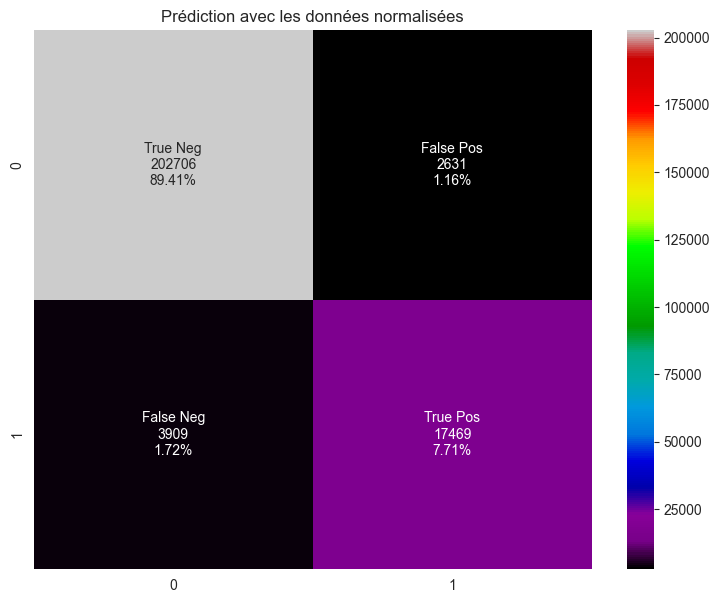

In [189]:
plot_confusion_matrix(cf_matrix)

In [190]:
test_path =  'evaluation/'
test_mask_path = 'sample/'
#test_path =  '/tmp/kaggledata/solafue_solars/train/s2_image/'
#test_mask_path = '/tmp/kaggledata/solafue_solars/train/mask/'

masks = glob.glob(f'{test_mask_path}/*')
tests = glob.glob(f'{test_path}/*')
masks.sort()
tests.sort()


In [191]:
import os
if not os.path.isdir('output'):
    os.mkdir('output')

In [193]:



for i, (m, t) in tqdm(enumerate(zip(masks, tests))):

    basename = os.path.basename(m)
    output_file = f'out_f1/{basename}'

    img = tifffile.imread(t).astype(np.float)
    mask = tifffile.imread(m).astype(np.float)
    img = img.reshape(-1, 12)

    img = pd.DataFrame(data=img, columns= ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10','B11','B12'])
    #img = create_feature (img, par = False)

    #img = img[['B1', 'B2' ,'B6', 'B8', 'B9', 'B10']]

    for col in cols:
        df[col] = np.log1p(df[col])

    #img = scaler.transform(img)

    shape_mask = mask.shape

    pred = optimal_mask_model.predict_proba(img)

    pred_mask = np.argmax(pred, axis=1).astype(np.uint8)
    pred_mask = pred_mask.reshape(shape_mask[0], shape_mask[1])

    tifffile.imwrite(output_file, pred_mask)


2066it [09:02,  3.81it/s]


In [194]:
import shutil
shutil.make_archive('output_f1', 'zip', 'out_f1')

'/Users/ceyhun/XDARRAY_WORKING_FOLDER/output_f1.zip'